# Learn Pandas With Energy Dataset

This file is my cheat sheet of things that I learn from the quiz in the coursera course called:
    Introduction to Data Science in Python by University of Michigan

Assignment 3 - More Pandas
Load the energy data from the file Energy Indicators.xls, which is a list of indicators of energy supply and renewable electricity production from the United Nations for the year 2013, and should be put into a DataFrame with the variable name of energy.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']

Convert Energy Supply to gigajoules (there are 1,000,000 gigajoules in a petajoule). For all countries which have missing data (e.g. data with "...") make sure this is reflected as np.NaN values.

Rename the following list of countries (for use in later questions):

"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"

There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these,

e.g.

'Bolivia (Plurinational State of)' should be 'Bolivia',

'Switzerland17' should be 'Switzerland'.



Next, load the GDP data from the file world_bank.csv, which is a csv containing countries' GDP from 1960 to 2015 from World Bank. Call this DataFrame GDP.

Make sure to skip the header, and rename the following list of countries:

"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"



Finally, load the Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology from the file scimagojr-3.xlsx, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame ScimEn.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15).

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

This function should return a DataFrame with 20 columns and 15 entries.

In [6]:
import numpy as np
import pandas as pd
energy = pd.read_excel('Energy Indicators.xls')
energy = energy[16:243]
energy = energy.drop(energy.columns[[0, 1]], axis=1)
energy.rename(columns={'Environmental Indicators: Energy': 'Country','Unnamed: 3':'Energy Supply','Unnamed: 4':'Energy Supply per Capita','Unnamed: 5':'% Renewable'}, inplace=True)
energy.replace('...', np.nan,inplace = True)
energy['Energy Supply'] *= 1000000
energy['Country'] = energy['Country'].str.replace(r" \(.*\)","")
energy['Country'] = energy['Country'].str.replace(r"[0-9]","")
energy['Country'] = energy['Country'].replace({'China, Hong Kong Special Administrative Region':'Hong Kong','United Kingdom of Great Britain and Northern Ireland':'United Kingdom','Republic of Korea':'South Korea','United States of America':'United States','Iran (Islamic Republic of)':'Iran'})

GDP = pd.read_csv('world_bank.csv', skiprows=4)
GDP.rename(columns = {'Country Name':'Country'}, inplace=True)
replace = {"Korea, Rep.": "South Korea", "Iran, Islamic Rep.": "Iran", "Hong Kong SAR, China": "Hong Kong"}
GDP.replace({"Country": replace},inplace = True)

ScimEn = pd.read_excel('scimagojr-3.xlsx')

df = pd.merge(pd.merge(energy, GDP, on='Country'), ScimEn, on='Country')
df.set_index('Country',inplace=True)
df = df[['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
df = (df.loc[df['Rank'].isin(range(1,16))])
df.sort_values('Rank',inplace=True)
df

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,147887,147512,856806,583858,5.79,162,1.271910e+11,93.0,19.754910,2.752132e+12,3.552182e+12,4.598206e+12,5.109954e+12,6.100620e+12,7.572554e+12,8.560547e+12,9.607224e+12,1.048237e+13,1.106467e+13
United States,2,113579,111426,1085684,370574,9.56,259,9.083800e+10,286.0,11.570980,1.385589e+13,1.447764e+13,1.471858e+13,1.441874e+13,1.496437e+13,1.551793e+13,1.615526e+13,1.669152e+13,1.739310e+13,1.812071e+13
Japan,3,34294,34054,275980,73491,8.05,145,1.898400e+10,149.0,10.232820,4.530377e+12,4.515265e+12,5.037908e+12,5.231383e+12,5.700098e+12,6.157460e+12,6.203213e+12,5.155717e+12,4.848733e+12,4.383076e+12
United Kingdom,4,24328,23671,278694,52119,11.46,159,7.920000e+09,124.0,10.600470,2.692613e+12,3.074360e+12,2.890564e+12,2.382826e+12,2.441173e+12,2.619700e+12,2.662085e+12,2.739819e+12,3.022828e+12,2.885570e+12
India,5,21450,21183,179494,54929,8.37,132,3.319500e+10,26.0,14.969080,9.203165e+11,1.201112e+12,1.186953e+12,1.323940e+12,1.656617e+12,1.823050e+12,1.827638e+12,1.856722e+12,2.035393e+12,2.089865e+12
Russian Federation,6,21259,20915,45629,17368,2.15,65,3.070900e+10,214.0,17.288680,9.899305e+11,1.299705e+12,1.660844e+12,1.222644e+12,1.524916e+12,2.051662e+12,2.210257e+12,2.297128e+12,2.063663e+12,1.365864e+12
Germany,7,20898,20640,193676,39615,9.27,140,1.326100e+10,165.0,17.901530,3.002446e+12,3.439953e+12,3.752366e+12,3.418005e+12,3.417095e+12,3.757698e+12,3.543984e+12,3.752514e+12,3.890607e+12,3.375611e+12
Canada,8,20689,20353,285554,53955,13.80,165,1.043100e+10,296.0,61.945430,1.315415e+12,1.464977e+12,1.549131e+12,1.371153e+12,1.613464e+12,1.788648e+12,1.824289e+12,1.842628e+12,1.792883e+12,1.552808e+12
France,9,15584,15387,173959,37411,11.16,129,1.059700e+10,166.0,17.020280,2.325012e+12,2.663113e+12,2.923466e+12,2.693827e+12,2.646837e+12,2.862680e+12,2.681416e+12,2.808511e+12,2.849305e+12,2.433562e+12


In [8]:
#merge database using UNION method e.g. outer merge
all = pd.merge(pd.merge(energy, GDP, on='Country', how='outer'), ScimEn, on='Country', how='outer')
all

,Country,Energy Supply,Energy Supply per Capita,% Renewable,Country Code,Indicator Name,Indicator Code,1960,1961,1962,...,2016,2017,Unnamed: 62,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,Afghanistan,3.210000e+08,10.0,78.669280,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,...,1.946902e+10,NaN,NaN,159.0,5.0,5.0,5.0,0.0,1.00,1.0
1,Albania,1.020000e+08,35.0,100.000000,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,...,1.186387e+10,NaN,NaN,120.0,27.0,27.0,217.0,14.0,8.04,7.0
2,Algeria,1.959000e+09,51.0,0.551010,DZA,GDP (current US$),NY.GDP.MKTP.CD,2.723649e+09,2.434777e+09,2.001469e+09,...,1.590491e+11,NaN,NaN,40.0,1645.0,1626.0,11257.0,2286.0,6.84,46.0
3,American Samoa,NaN,NaN,0.641026,ASM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,...,6.580000e+08,NaN,NaN,190.0,1.0,1.0,0.0,0.0,0.00,0.0
4,Andorra,9.000000e+06,121.0,88.695650,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,...,2.858518e+09,NaN,NaN,169.0,2.0,2.0,15.0,0.0,7.50,1.0
5,Angola,6.420000e+08,27.0,70.909090,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,...,9.533511e+10,NaN,NaN,104.0,56.0,56.0,140.0,2.0,2.50,7.0
6,Anguilla,2.000000e+06,136.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Antigua and Barbuda,8.000000e+06,84.0,0.000000,ATG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,...,1.460145e+09,NaN,NaN,171.0,2.0,2.0,0.0,0.0,0.00,0.0
8,Argentina,3.378000e+09,79.0,24.064520,ARG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,2.445060e+10,...,5.454761e+11,NaN,NaN,43.0,1389.0,1379.0,14060.0,2050.0,10.12,52.0
9,Armenia,1.430000e+08,48.0,28.236060,ARM,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,...,1.057230e+10,NaN,NaN,88.0,105.0,105.0,648.0,250.0,6.17,13.0


In [10]:
#Calculates the average GDP of each country over the years from 2006 to 2015
years = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
df[years].mean(axis=1).sort_values(ascending=False).rename('avgGDP')

Country
United States         1.563137e+13
China                 6.940046e+12
Japan                 5.176323e+12
Germany               3.535028e+12
United Kingdom        2.741154e+12
France                2.688773e+12
Italy                 2.131032e+12
Brazil                1.989028e+12
Russian Federation    1.668661e+12
Canada                1.611540e+12
India                 1.592161e+12
Spain                 1.407027e+12
Australia             1.202763e+12
South Korea           1.165810e+12
Iran                  4.393498e+11
Name: avgGDP, dtype: float64

In [18]:
df['avgGDP'] = df[years].mean(axis=1).sort_values(ascending=False).rename('avgGDP')
df.sort_values(by='avgGDP', inplace=True, ascending=False)
df['diffGDP'] = df['2015']-df['2006']
df

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,...,2008,2009,2010,2011,2012,2013,2014,2015,avgGDP,diffGDP
Country,,,,,,,,,,,,,,,,,,,,,
United States,2,113579,111426,1085684,370574,9.56,259,9.083800e+10,286.0,11.570980,...,1.471858e+13,1.441874e+13,1.496437e+13,1.551793e+13,1.615526e+13,1.669152e+13,1.739310e+13,1.812071e+13,1.563137e+13,4.264826e+12
China,1,147887,147512,856806,583858,5.79,162,1.271910e+11,93.0,19.754910,...,4.598206e+12,5.109954e+12,6.100620e+12,7.572554e+12,8.560547e+12,9.607224e+12,1.048237e+13,1.106467e+13,6.940046e+12,8.312535e+12
Japan,3,34294,34054,275980,73491,8.05,145,1.898400e+10,149.0,10.232820,...,5.037908e+12,5.231383e+12,5.700098e+12,6.157460e+12,6.203213e+12,5.155717e+12,4.848733e+12,4.383076e+12,5.176323e+12,-1.473009e+11
Germany,7,20898,20640,193676,39615,9.27,140,1.326100e+10,165.0,17.901530,...,3.752366e+12,3.418005e+12,3.417095e+12,3.757698e+12,3.543984e+12,3.752514e+12,3.890607e+12,3.375611e+12,3.535028e+12,3.731647e+11
United Kingdom,4,24328,23671,278694,52119,11.46,159,7.920000e+09,124.0,10.600470,...,2.890564e+12,2.382826e+12,2.441173e+12,2.619700e+12,2.662085e+12,2.739819e+12,3.022828e+12,2.885570e+12,2.741154e+12,1.929576e+11
France,9,15584,15387,173959,37411,11.16,129,1.059700e+10,166.0,17.020280,...,2.923466e+12,2.693827e+12,2.646837e+12,2.862680e+12,2.681416e+12,2.808511e+12,2.849305e+12,2.433562e+12,2.688773e+12,1.085501e+11
Italy,11,13662,13457,154242,37030,11.29,121,6.530000e+09,109.0,33.667230,...,2.390729e+12,2.185160e+12,2.125058e+12,2.276292e+12,2.072823e+12,2.130491e+12,2.151733e+12,1.832347e+12,2.131032e+12,-1.102863e+11
Brazil,15,10599,10521,84010,20271,7.93,97,1.214900e+10,59.0,69.648030,...,1.695825e+12,1.667020e+12,2.208872e+12,2.616202e+12,2.465189e+12,2.472807e+12,2.455993e+12,1.803653e+12,1.989028e+12,6.960123e+11
Russian Federation,6,21259,20915,45629,17368,2.15,65,3.070900e+10,214.0,17.288680,...,1.660844e+12,1.222644e+12,1.524916e+12,2.051662e+12,2.210257e+12,2.297128e+12,2.063663e+12,1.365864e+12,1.668661e+12,3.759336e+11


In [19]:
df['Energy Supply per Capita'].mean()

157.6

In [20]:
winner = df.sort_values(by='% Renewable', ascending=False).iloc[0]
(winner.name, winner['% Renewable'])

('Brazil', 69.648030000000006)

In [22]:
df['Citation_ratio'] = df['Self-citations']/df['Citations']
bestct = df.sort_values(by='Citation_ratio', ascending=False).iloc[0]
(bestct.name, bestct['Citation_ratio'])

('China', 0.68143547080669364)

In [26]:
df['Population'] = df['Energy Supply']/df['Energy Supply per Capita']
df.sort_values(by='Population', ascending=False).index[2]

'United States'

In [28]:
#correlation between energy supply per capita and average citation documents per person
df['avgCiteDocPerPerson'] = df['Citable documents'] / df['Population']
df['Energy Supply per Capita'].corr(df['avgCiteDocPerPerson'])

0.79199716982784074

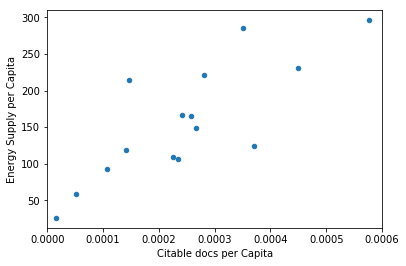

In [31]:
def plot():
    import matplotlib as plt
    %matplotlib inline
    
    df['PopEst'] = df['Energy Supply'] / df['Energy Supply per Capita']
    df['Citable docs per Capita'] = df['Citable documents'] / df['PopEst']
    df.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])
plot()

In [32]:
#above median = 1 and below median =0
median = df['% Renewable'].median()
HighRenew = df['% Renewable']>=median
HighRenew = HighRenew.apply(lambda x:1 if x else 0)
HighRenew

Country
United States         0
China                 1
Japan                 0
Germany               1
United Kingdom        0
France                1
Italy                 1
Brazil                1
Russian Federation    1
Canada                1
India                 0
Spain                 1
Australia             0
South Korea           0
Iran                  0
Name: % Renewable, dtype: int64

In [33]:
#create a new data frame that gives a summary for each continent
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
newdf = pd.DataFrame(columns = ['size', 'sum', 'mean', 'std'])
for continent, countries in df.groupby(ContinentDict):
    newdf.loc[continent] = [len(countries), countries['Population'].sum(),countries['Population'].mean(),countries['Population'].std()]
newdf

,size,sum,mean,std
Asia,5.0,2.898666e+09,5.797333e+08,6.790979e+08
Australia,1.0,2.331602e+07,2.331602e+07,NaN
Europe,6.0,4.579297e+08,7.632161e+07,3.464767e+07
North America,2.0,3.528552e+08,1.764276e+08,1.996696e+08
South America,1.0,2.059153e+08,2.059153e+08,NaN


This is an example of a visualization that can be created to help understand the data.     This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries'     2014 GDP, and the color corresponds to the continent.


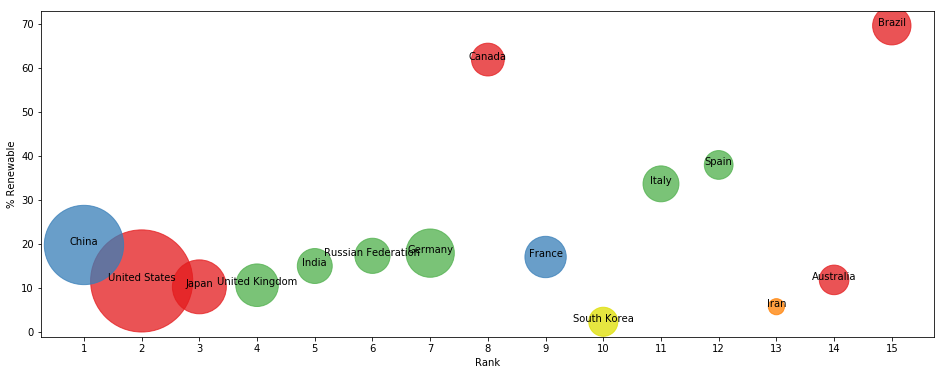

In [35]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    ax = df.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*df['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(df.index):
        ax.annotate(txt, [df['Rank'][i], df['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
    This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
    2014 GDP, and the color corresponds to the continent.")
plot_optional()